# Create ensemble tier file

In [1]:
import os
if 'notebooks' in os.getcwd(): os.chdir('../..')  # change to main directory
print('Working directory:', os.getcwd() )

Working directory: /scratch/snx3000/bp000429/submission/adrian_sensorium


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
%matplotlib inline

In [4]:
folders = sorted( glob.glob( "notebooks/data/static*/") )
folders

['notebooks/data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/',
 'notebooks/data/static22846-10-16-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/',
 'notebooks/data/static23343-5-17-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/',
 'notebooks/data/static23656-14-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/',
 'notebooks/data/static23964-4-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/',
 'notebooks/data/static27204-5-13-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/']

In [5]:
# helper function for plotting
def tier_to_int( tier_str ):
    tier_int = np.zeros_like( tier_str, dtype=int)
    tier_int[ tier_str=='train' ] = 0
    tier_int[ tier_str=='validation' ] = 1
    tier_int[ tier_str=='test' ] = 2
    tier_int[ tier_str=='final_test' ] = 3  
    return tier_int

Working on:  notebooks/data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/
Working on:  notebooks/data/static22846-10-16-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/
Working on:  notebooks/data/static23343-5-17-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/
Working on:  notebooks/data/static23656-14-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/
Working on:  notebooks/data/static23964-4-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/
Working on:  notebooks/data/static27204-5-13-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/


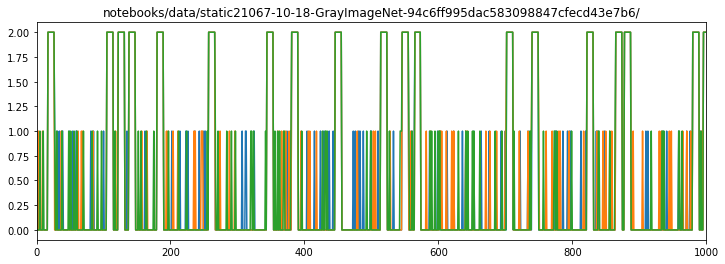

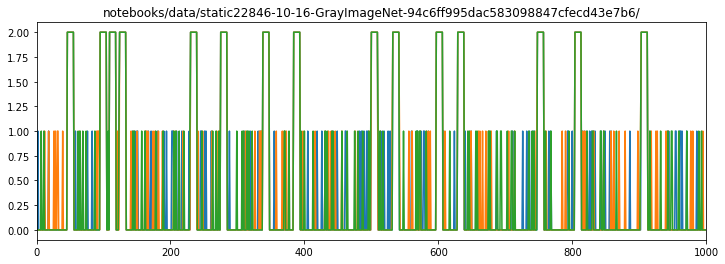

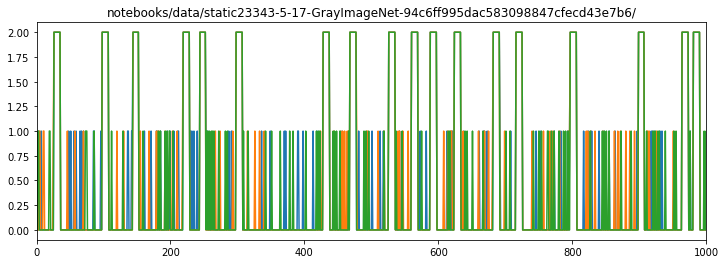

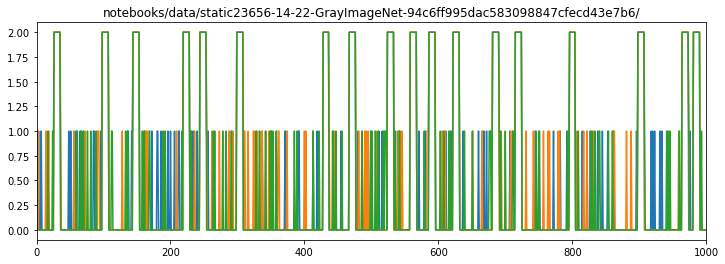

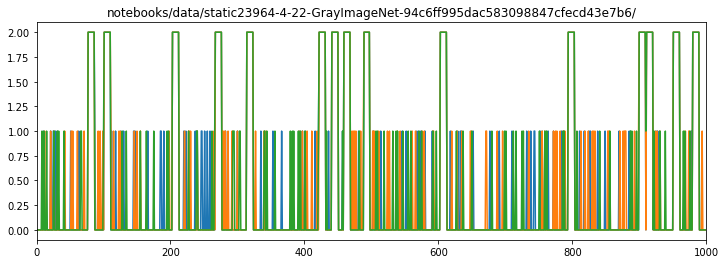

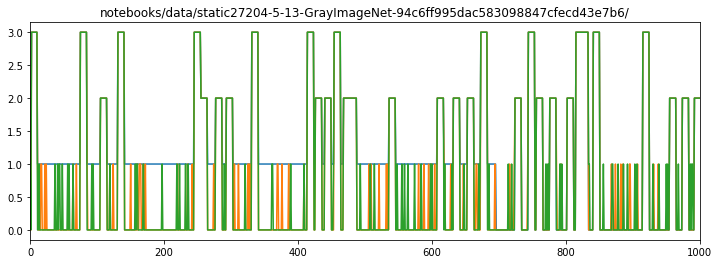

In [6]:
for folder in folders:
    print('Working on: ', folder)
    
    # read in original tiers
    tier_file =  '/meta/trials/tiers.npy'
    tier_raw =  np.load( os.path.join(folder + tier_file ))
    
    # create 5 shuffles of train/val while keeping test data in place
    ensemble_tier = np.zeros( (5, len(tier_raw)), dtype='<U10')
    train_val_locs = (tier_raw == 'train') | (tier_raw == 'validation')
    to_shuffle = tier_raw[train_val_locs]
    
    np.random.seed(35382)  # seed here to make it independent of order of folders
    for i in range(5):
        ensemble_tier[i,:] = np.copy( tier_raw )
        ensemble_tier[i,train_val_locs] = np.random.permutation(to_shuffle)
    
    # save array
    np.save( folder + '/meta/trials/ensemble_tiers.npy', ensemble_tier )
    
    # double check that test data remains not shuffled
    plt.figure(figsize=(12,4))
    plt.plot(tier_to_int(tier_raw))
    plt.plot(tier_to_int(ensemble_tier[2,:]))
    plt.plot(tier_to_int(ensemble_tier[3,:]))
    plt.title(folder)
    plt.xlim((0,1000))
